Number of components to retain 95% variance: 39
Explained variance ratio per component:
[0.2351335  0.14820374 0.06823526 0.05851816 0.05149728 0.03986065
 0.03022704 0.02933601 0.02615587 0.02082214 0.02029174 0.01752544
 0.01549853 0.01439841 0.01354044 0.01245963 0.01165309 0.01130351
 0.01001575 0.00945356 0.00927086 0.00870646 0.00825644 0.00778488
 0.00734771 0.00678994 0.00625412 0.00574802 0.00553749 0.0054094
 0.0051815  0.00474242 0.00446452 0.00411585 0.00400232 0.00379949
 0.00364819 0.00344586 0.00309628]
Cumulative explained variance: 0.951731489994762
PCA analysis complete. PCA features saved to pca_features.csv
Explained variance plot saved to explained_variance.png


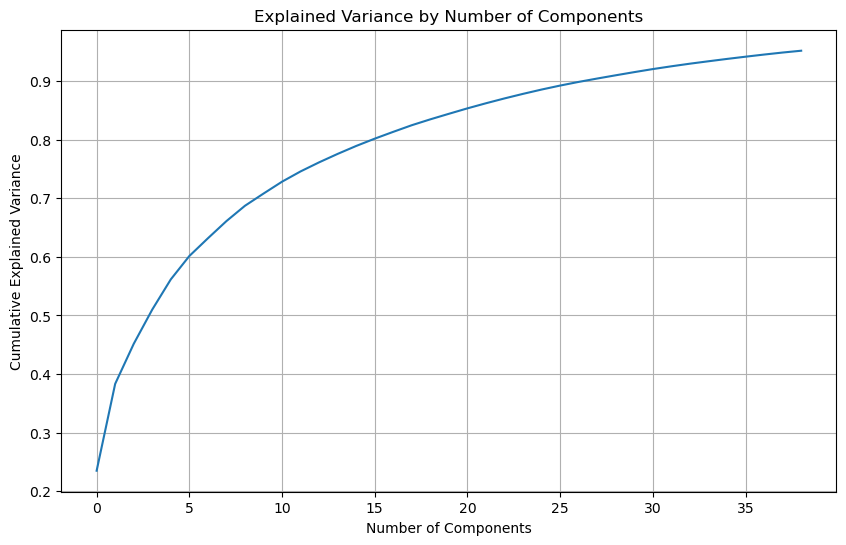

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


combined_df = pd.read_csv("data/combined_data_and_features.csv")

numerical_cols = combined_df.select_dtypes(include=np.number).columns.tolist()
exclude_cols = [col for col in ["open", "high", "low", "close", "adj_close", "volume"] if col in numerical_cols]
features_for_pca = [col for col in numerical_cols if col not in exclude_cols]

X = combined_df[features_for_pca].copy()

# cleanup
X.dropna(axis=1, how='all', inplace=True)
X = X.fillna(X.mean())
if X.isnull().sum().sum() > 0:
    X.dropna(inplace=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)  # put 95% of variance
X_pca = pca.fit_transform(X_scaled)


print(f"Number of components to retain 95% variance: {pca.n_components_}")
print(f"Explained variance ratio per component:\n{pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.sum(pca.explained_variance_ratio_)}")

pca_df = pd.DataFrame(data=X_pca, columns=[f"principal_component_{i+1}" for i in range(pca.n_components_)])

# cleanup
combined_df_filtered = combined_df[features_for_pca].copy()
combined_df_filtered.dropna(axis=1, how='all', inplace=True)
combined_df_filtered.dropna(inplace=True)

pca_df = pd.concat([combined_df.loc[combined_df_filtered.index, ["company", "date"]], pca_df], axis=1)

pca_df.to_csv("data/pca_features.csv", index=False)

print("PCA analysis complete. PCA features saved to pca_features.csv")

# plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Number of Components")
plt.grid(True)
plt.savefig("explained_variance.png")
print("Explained variance plot saved to explained_variance.png")


